In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 150)
import re
import matplotlib.pyplot as plot
import cufflinks as cf
import glob
import os

In [2]:
pip install fastparquet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ivank\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
df1 = pd.read_csv('Historico/Historico.csv', low_memory=False)

In [3]:
df1.shape


(123028694, 9)

In [4]:
df1.head(10)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,28.0,69,85,2010-02-16,12:42:32,85,2010-02-16,12:45:37
1,M,30.0,11,85,2010-02-16,12:53:29,26,2010-02-16,13:22:23
2,M,37.0,43,85,2010-02-16,13:21:46,13,2010-02-16,13:49:47
3,M,37.0,826,22,2010-02-16,14:06:40,85,2010-02-16,14:23:13
4,M,19.0,662,27,2010-02-16,15:31:15,74,2010-02-16,16:29:17
5,F,25.0,8,85,2010-02-16,16:31:53,20,2010-02-16,16:49:26
6,F,31.0,5,85,2010-02-16,16:33:25,20,2010-02-16,16:49:28
7,M,28.0,680,20,2010-02-16,17:06:18,25,2010-02-16,17:22:56
8,M,28.0,618,20,2010-02-16,17:30:14,17,2010-02-16,17:48:24
9,M,32.0,812,49,2010-02-16,18:10:21,72,2010-02-16,18:16:21


In [5]:
df1 = df1[~(df1['Hora_Arribo'].isna())]
df1 = df1[~(df1['Hora_Retiro'].isna())]

In [6]:
df1.shape

(123017535, 9)

In [7]:
df1['Fecha_Retiro'] = pd.to_datetime(df1['Fecha_Retiro'], errors='coerce')
df1['Fecha_Arribo'] = pd.to_datetime(df1['Fecha_Arribo'], errors='coerce')

C:\Users\ivank\AppData\Local\Temp\ipykernel_5228\410089315.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

C:\Users\ivank\AppData\Local\Temp\ipykernel_5228\410089315.py:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [8]:
df1['Inicio_completo'] = pd.to_datetime(
    df1['Fecha_Retiro'].dt.strftime('%Y-%m-%d') + ' ' + df1['Hora_Retiro'], errors='coerce'
)
df1['Fin_completo'] = pd.to_datetime(
    df1['Fecha_Arribo'].dt.strftime('%Y-%m-%d') + ' ' + df1['Hora_Arribo'], errors='coerce'
)

In [9]:
df1['Duracion'] = df1['Fin_completo'] - df1['Inicio_completo']

In [10]:
df1

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Inicio_completo,Fin_completo,Duracion
0,M,28.0,69,85,2010-02-16,12:42:32,85,2010-02-16,12:45:37,2010-02-16 12:42:32,2010-02-16 12:45:37,0 days 00:03:05
1,M,30.0,11,85,2010-02-16,12:53:29,26,2010-02-16,13:22:23,2010-02-16 12:53:29,2010-02-16 13:22:23,0 days 00:28:54
2,M,37.0,43,85,2010-02-16,13:21:46,13,2010-02-16,13:49:47,2010-02-16 13:21:46,2010-02-16 13:49:47,0 days 00:28:01
3,M,37.0,826,22,2010-02-16,14:06:40,85,2010-02-16,14:23:13,2010-02-16 14:06:40,2010-02-16 14:23:13,0 days 00:16:33
4,M,19.0,662,27,2010-02-16,15:31:15,74,2010-02-16,16:29:17,2010-02-16 15:31:15,2010-02-16 16:29:17,0 days 00:58:02
...,...,...,...,...,...,...,...,...,...,...,...,...
123028689,M,30,3499332,034,2025-06-30,23:46:31,570,2025-06-30,23:59:20,2025-06-30 23:46:31,2025-06-30 23:59:20,0 days 00:12:49
123028690,F,42,7103211,021,2025-06-30,23:52:42,071,2025-06-30,23:59:24,2025-06-30 23:52:42,2025-06-30 23:59:24,0 days 00:06:42
123028691,F,24,4275772,547,2025-06-30,23:48:53,259,2025-06-30,23:59:30,2025-06-30 23:48:53,2025-06-30 23:59:30,0 days 00:10:37
123028692,M,24,8124844,547,2025-06-30,23:48:32,259,2025-06-30,23:59:34,2025-06-30 23:48:32,2025-06-30 23:59:34,0 days 00:11:02


In [11]:
df1.drop(columns=['Inicio_completo', 'Fin_completo'], inplace=True)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df1

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Duracion
0,M,28.0,69,85,2010-02-16,12:42:32,85,2010-02-16,12:45:37,0 days 00:03:05
1,M,30.0,11,85,2010-02-16,12:53:29,26,2010-02-16,13:22:23,0 days 00:28:54
2,M,37.0,43,85,2010-02-16,13:21:46,13,2010-02-16,13:49:47,0 days 00:28:01
3,M,37.0,826,22,2010-02-16,14:06:40,85,2010-02-16,14:23:13,0 days 00:16:33
4,M,19.0,662,27,2010-02-16,15:31:15,74,2010-02-16,16:29:17,0 days 00:58:02
...,...,...,...,...,...,...,...,...,...,...
123028689,M,30,3499332,034,2025-06-30,23:46:31,570,2025-06-30,23:59:20,0 days 00:12:49
123028690,F,42,7103211,021,2025-06-30,23:52:42,071,2025-06-30,23:59:24,0 days 00:06:42
123028691,F,24,4275772,547,2025-06-30,23:48:53,259,2025-06-30,23:59:30,0 days 00:10:37
123028692,M,24,8124844,547,2025-06-30,23:48:32,259,2025-06-30,23:59:34,0 days 00:11:02


In [13]:
df1

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Duracion
0,M,28.0,69,85,85,0 days 00:03:05
1,M,30.0,11,85,26,0 days 00:28:54
2,M,37.0,43,85,13,0 days 00:28:01
3,M,37.0,826,22,85,0 days 00:16:33
4,M,19.0,662,27,74,0 days 00:58:02
...,...,...,...,...,...,...
123028689,M,30,3499332,034,570,0 days 00:12:49
123028690,F,42,7103211,021,071,0 days 00:06:42
123028691,F,24,4275772,547,259,0 days 00:10:37
123028692,M,24,8124844,547,259,0 days 00:11:02


In [15]:
df1.head(10)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Duracion
0,M,28.0,69,85,85,0 days 00:03:05
1,M,30.0,11,85,26,0 days 00:28:54
2,M,37.0,43,85,13,0 days 00:28:01
3,M,37.0,826,22,85,0 days 00:16:33
4,M,19.0,662,27,74,0 days 00:58:02
5,F,25.0,8,85,20,0 days 00:17:33
6,F,31.0,5,85,20,0 days 00:16:03
7,M,28.0,680,20,25,0 days 00:16:38
8,M,28.0,618,20,17,0 days 00:18:10
9,M,32.0,812,49,72,0 days 00:06:00


In [14]:
df1['Duracion'] = df1['Duracion'].dt.total_seconds() / 60

In [15]:
df1['Duracion'] = df1['Duracion'].apply(lambda x: x if 0 < x < 1440 else np.nan)

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df1['Hora_Arribo'] = pd.to_datetime(df1['Hora_Arribo'], format="%H:%M:%S", errors='coerce')
df1['Hora_Retiro'] = pd.to_datetime(df1['Hora_Retiro'], format="%H:%M:%S", errors='coerce')

In [18]:
df1['Hora_Arribo_num'] = df1['Hora_Arribo'].dt.hour * 60 + df1['Hora_Arribo'].dt.minute
df1['Hora_Retiro_num'] = df1['Hora_Retiro'].dt.hour * 60 + df1['Hora_Retiro'].dt.minute
df1.drop(columns=['Hora_Retiro','Hora_Arribo'], inplace=True)


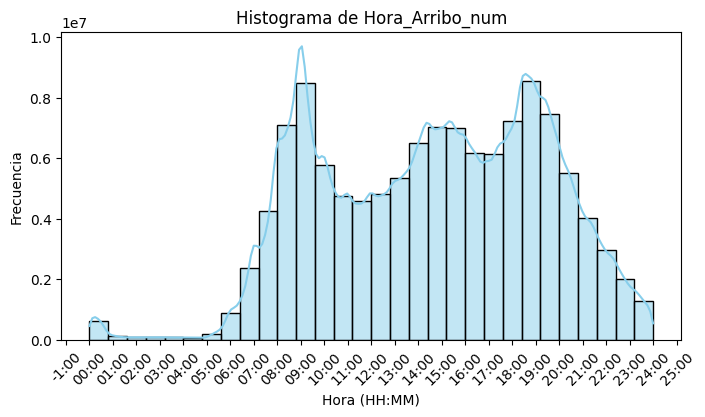

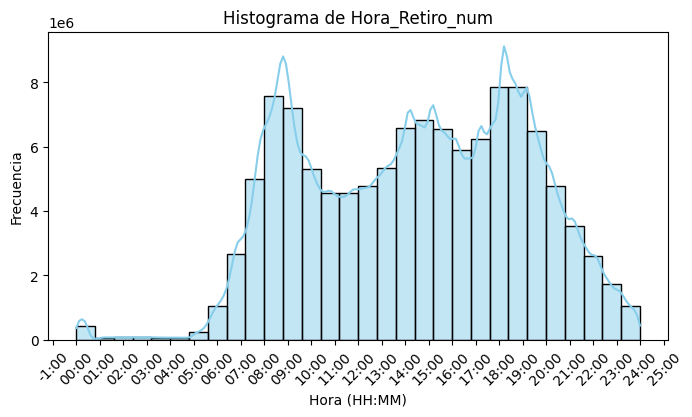

In [19]:
import matplotlib.ticker as ticker

def minutes_to_hhmm(x, pos):
    h = int(x // 60)
    m = int(x % 60)
    return f'{h:02d}:{m:02d}'

for var in ['Hora_Arribo_num', 'Hora_Retiro_num']:
    plt.figure(figsize=(8,4))
    ax = sns.histplot(df1[var].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Histograma de {var}')
    plt.xlabel('Hora (HH:MM)')
    plt.ylabel('Frecuencia')

    # Format x-axis labels
    ax.xaxis.set_major_locator(ticker.MultipleLocator(60))  # tick every hour
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(minutes_to_hhmm))

    plt.xticks(rotation=45)
    plt.show()

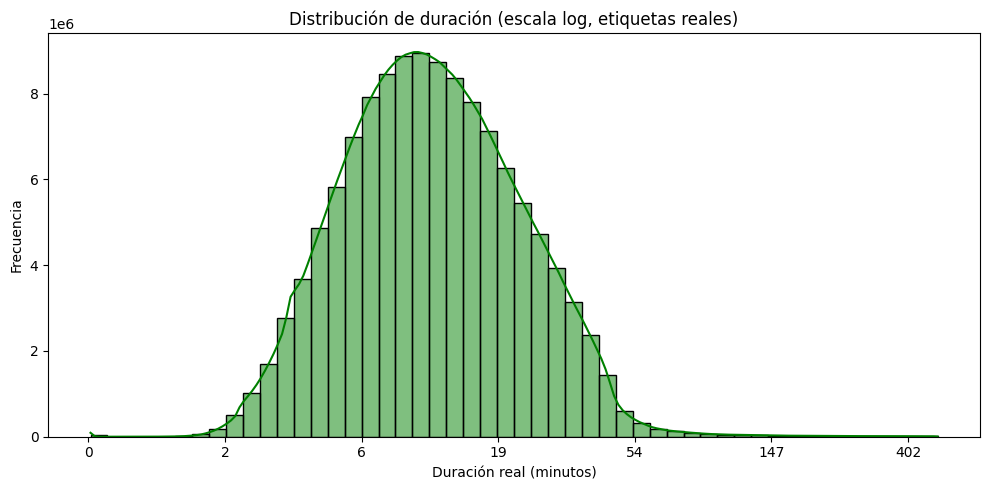

In [19]:
# Column with ride duration (assumed to be in minutes)
col = 'Duracion'

# Filter out outliers
filtered = df1[df1[col] < 500][col].astype(float)

# Log-transform (log1p handles zeros)
log_duration = np.log1p(filtered)

# Inverse of log1p for formatting (e^x - 1)
def inverse_log1p(x, pos):
    return f'{np.expm1(x):.0f}'  # rounded to nearest minute

# Plot
plt.figure(figsize=(10, 5))
ax = sns.histplot(log_duration, bins=50, kde=True, color='green')

# Customize x-axis
ax.set_title('Distribución de duración (escala log, etiquetas reales)')
ax.set_xlabel('Duración real (minutos)')
ax.set_ylabel('Frecuencia')

# Apply the formatter
ax.xaxis.set_major_formatter(ticker.FuncFormatter(inverse_log1p))
plt.tight_layout()
plt.show()

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputador = SimpleImputer(strategy="most_frequent")
df1[['Edad_Usuario']] = imputador.fit_transform(df1[['Edad_Usuario']])

In [22]:
df1["Edad_Usuario"].unique()

array(['28.0', '30.0', '37.0', '19.0', '25.0', '31.0', '32.0', '45.0',
       '40.0', '23.0', '35.0', '27.0', '46.0', '29.0', '48.0', '56.0',
       '62.0', '47.0', '34.0', '39.0', '42.0', '43.0', '36.0', '21.0',
       '18.0', '51.0', '59.0', '24.0', '53.0', '38.0', '75.0', '55.0',
       '74.0', '61.0', '33.0', '52.0', '26.0', '64.0', '54.0', '57.0',
       '20.0', '44.0', '41.0', '69.0', '63.0', '65.0', '58.0', '66.0',
       '49.0', '50.0', '22.0', '68.0', '60.0', '71.0', '80.0', '67.0',
       '17.0', '77.0', '72.0', '70.0', '73.0', '78.0', '76.0', '79.0',
       '16.0', '2.0', '85.0', '82.0', '86.0', '81.0', '98.0', '115.0',
       '89.0', '108.0', '104.0', '84.0', '99.0', '100.0', '96.0', '87.0',
       '116.0', '83.0', '93.0', '94.0', '88.0', '91.0', '105.0', '4.0',
       '92.0', '106.0', '97.0', '117.0', '118.0', '95.0', '101.0',
       '119.0', '111.0', '120.0', '121.0', '90.0', '122.0', '123.0',
       '145.0', '137.0', '152.0', '102.0', '110.0', '124.0', '160.0',
       '1

In [23]:
df1 = df1[df1['Edad_Usuario']!='Edad_Usuario']

In [24]:
df1['Edad_Usuario'] = df1['Edad_Usuario'].astype(float).astype(int)


In [25]:
df1['Edad_Usuario'] = np.where(df1['Edad_Usuario']> 99, df1['Edad_Usuario'] - 100, df1['Edad_Usuario'])


In [26]:
df1

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Duracion,Hora_Arribo_num,Hora_Retiro_num
0,M,28,69,85,2010-02-16,85,2010-02-16,3.083333,765.0,762.0
1,M,30,11,85,2010-02-16,26,2010-02-16,28.900000,802.0,773.0
2,M,37,43,85,2010-02-16,13,2010-02-16,28.016667,829.0,801.0
3,M,37,826,22,2010-02-16,85,2010-02-16,16.550000,863.0,846.0
4,M,19,662,27,2010-02-16,74,2010-02-16,58.033333,989.0,931.0
...,...,...,...,...,...,...,...,...,...,...
123028689,M,30,3499332,034,2025-06-30,570,2025-06-30,12.816667,1439.0,1426.0
123028690,F,42,7103211,021,2025-06-30,071,2025-06-30,6.700000,1439.0,1432.0
123028691,F,24,4275772,547,2025-06-30,259,2025-06-30,10.616667,1439.0,1428.0
123028692,M,24,8124844,547,2025-06-30,259,2025-06-30,11.033333,1439.0,1428.0


In [27]:
df1.drop(columns=['Hora_Retiro_num','Hora_Arribo_num'], inplace=True)


In [28]:
# Definir rangos y etiquetas para Edad_Rangos
rangos = [0, 17, 25, 35, 45, 60, 100]
etiquetas = ['Menor', '18-25', '26-35', '36-45', '46-60', 'Adulto Mayor']

# Crear la nueva columna Edad_Rangos
df1['Edad_Rangos'] = pd.cut(df1['Edad_Usuario'], bins=rangos, labels=etiquetas, right=False)

df1.drop(columns=['Edad_Usuario'], inplace=True)

print(df1[['Edad_Rangos']].head())

  Edad_Rangos
0       26-35
1       26-35
2       36-45
3       36-45
4       18-25


In [29]:
df1['Edad_Rangos'].unique()

['26-35', '36-45', '18-25', '46-60', 'Adulto Mayor', 'Menor']
Categories (6, object): ['Menor' < '18-25' < '26-35' < '36-45' < '46-60' < 'Adulto Mayor']

In [30]:
df1['Genero_Usuario'] = df1['Genero_Usuario'].apply(lambda x: x if x in ['M','F'] else np.nan)
imputador = SimpleImputer(strategy="most_frequent")
df1[['Genero_Usuario']] = imputador.fit_transform(df1[['Genero_Usuario']])
df1['Genero_Usuario'] = df1['Genero_Usuario'].astype(str)

In [31]:
df1['Genero_Usuario'].unique()

array(['M', 'F'], dtype=object)

In [32]:
df1['Bici'] = pd.to_numeric(df1['Bici'], errors='coerce')
imputador = SimpleImputer(strategy="most_frequent")
df1[['Bici']] = imputador.fit_transform(df1[['Bici']])

In [33]:
imputador = SimpleImputer(strategy="most_frequent")
df1[['Ciclo_Estacion_Retiro']] = imputador.fit_transform(df1[['Ciclo_Estacion_Retiro']])
df1[['Ciclo_Estacion_Arribo']] = imputador.fit_transform(df1[['Ciclo_Estacion_Arribo']])

In [34]:
df1['Ciclo_Estacion_Retiro'] = pd.to_numeric(df1['Ciclo_Estacion_Retiro'], errors='coerce')
df1['Ciclo_Estacion_Arribo'] = pd.to_numeric(df1['Ciclo_Estacion_Arribo'], errors='coerce')

In [35]:
df1

,Genero_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Duracion,Edad_Rangos
0,M,69.0,85.0,2010-02-16,85.0,2010-02-16,3.083333,26-35
1,M,11.0,85.0,2010-02-16,26.0,2010-02-16,28.900000,26-35
2,M,43.0,85.0,2010-02-16,13.0,2010-02-16,28.016667,36-45
3,M,826.0,22.0,2010-02-16,85.0,2010-02-16,16.550000,36-45
4,M,662.0,27.0,2010-02-16,74.0,2010-02-16,58.033333,18-25
...,...,...,...,...,...,...,...,...
123028689,M,3499332.0,34.0,2025-06-30,570.0,2025-06-30,12.816667,26-35
123028690,F,7103211.0,21.0,2025-06-30,71.0,2025-06-30,6.700000,36-45
123028691,F,4275772.0,547.0,2025-06-30,259.0,2025-06-30,10.616667,18-25
123028692,M,8124844.0,547.0,2025-06-30,259.0,2025-06-30,11.033333,18-25


In [35]:
df1.to_parquet("DatosH.parquet", engine="pyarrow")

In [36]:
df1.shape

(123017530, 8)

In [37]:
variables_discretas = ["Genero_Usuario","Edad_Rangos","Bici",
                       "Ciclo_Estacion_Retiro","Ciclo_Estacion_Arribo",
                       "Fecha_Retiro","Fecha_Arribo"]

In [36]:
variables_discretas = ["Genero_Usuario","Edad_Rangos","Bici",
                       "Ciclo_Estacion_Retiro","Ciclo_Estacion_Arribo"
                       ]

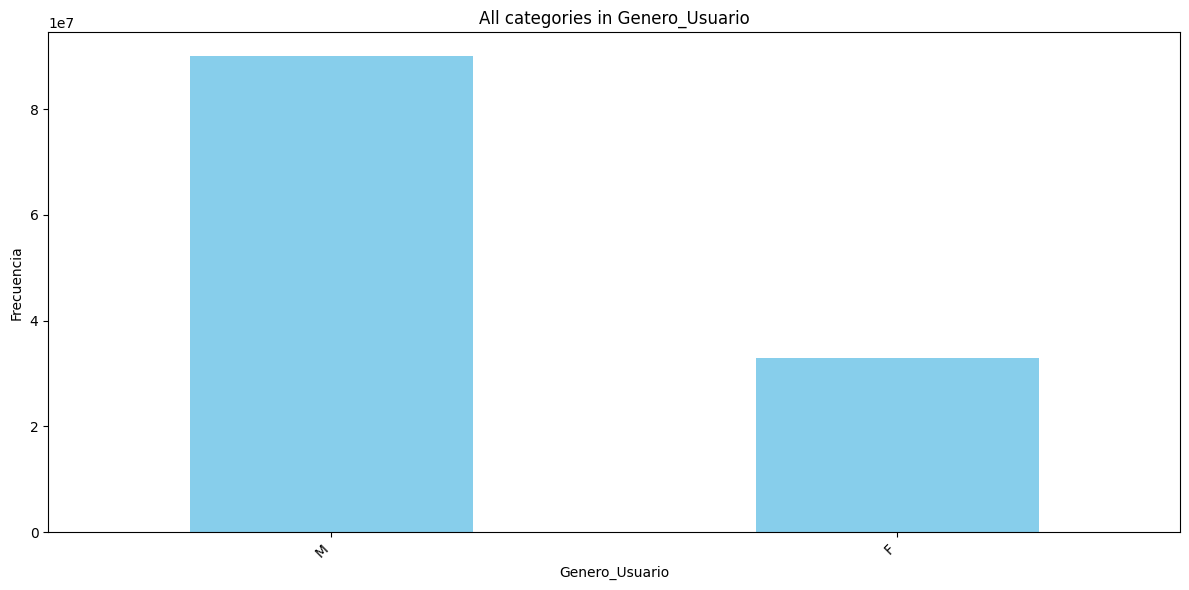

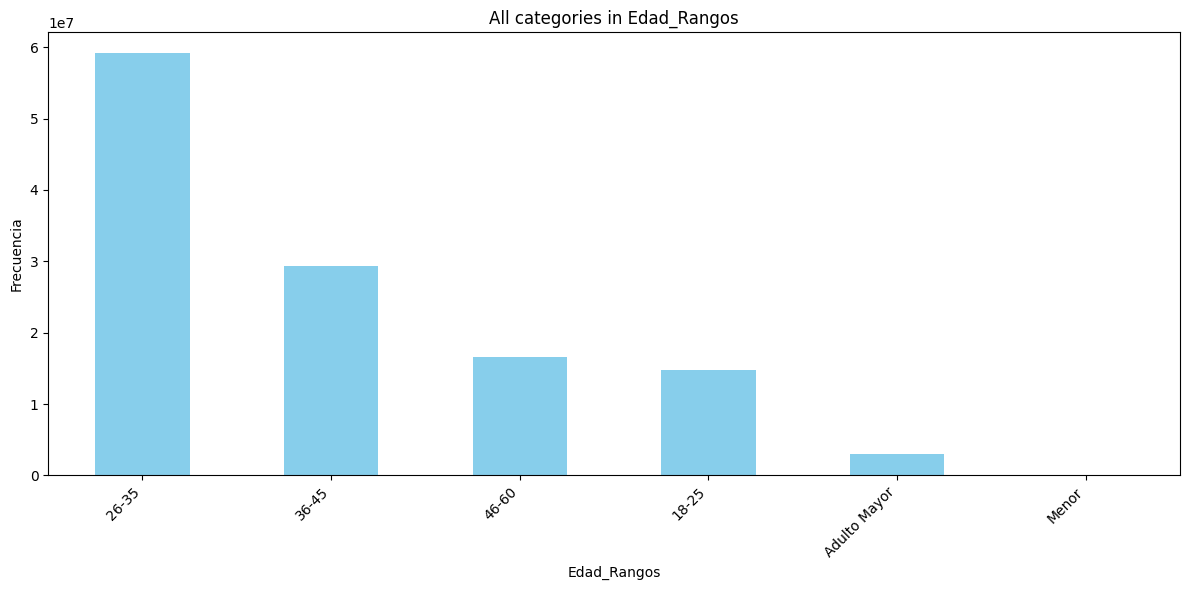

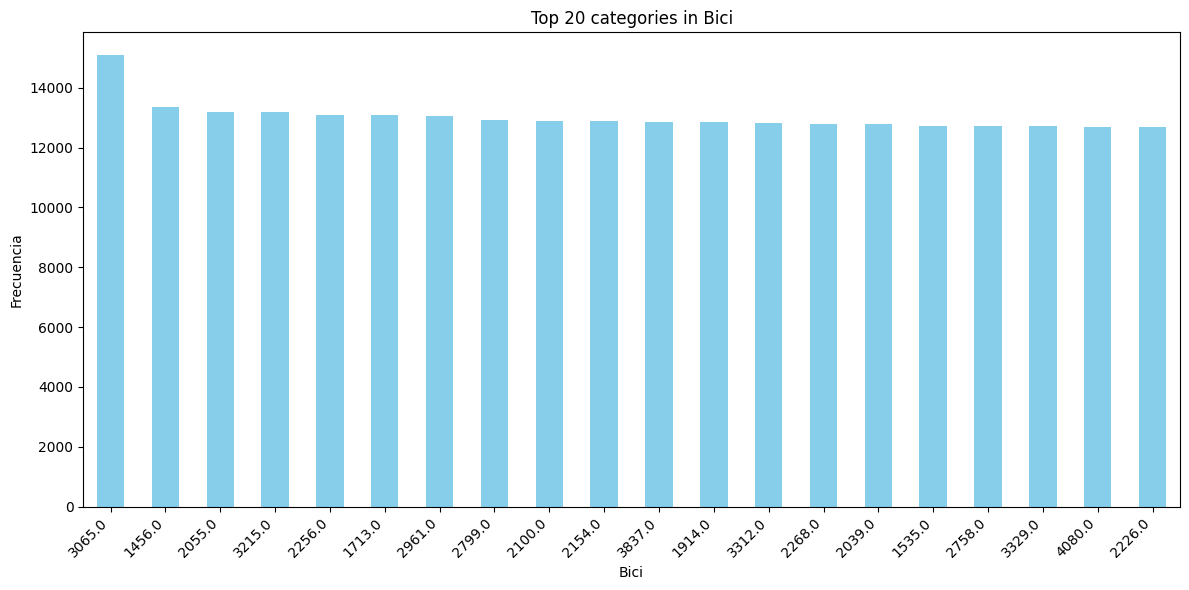

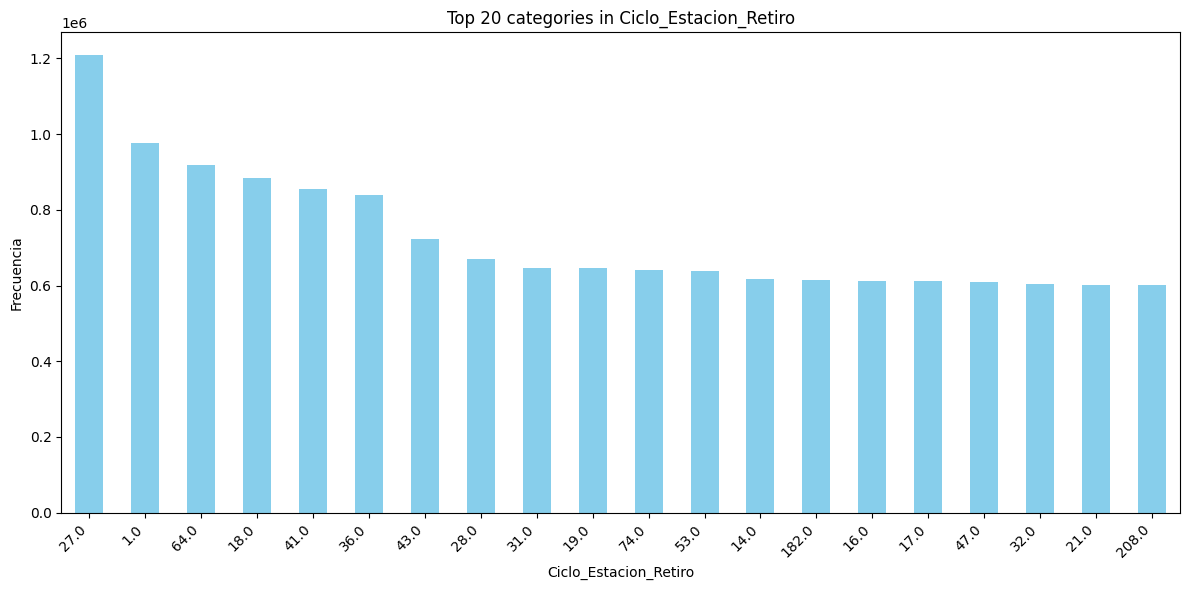

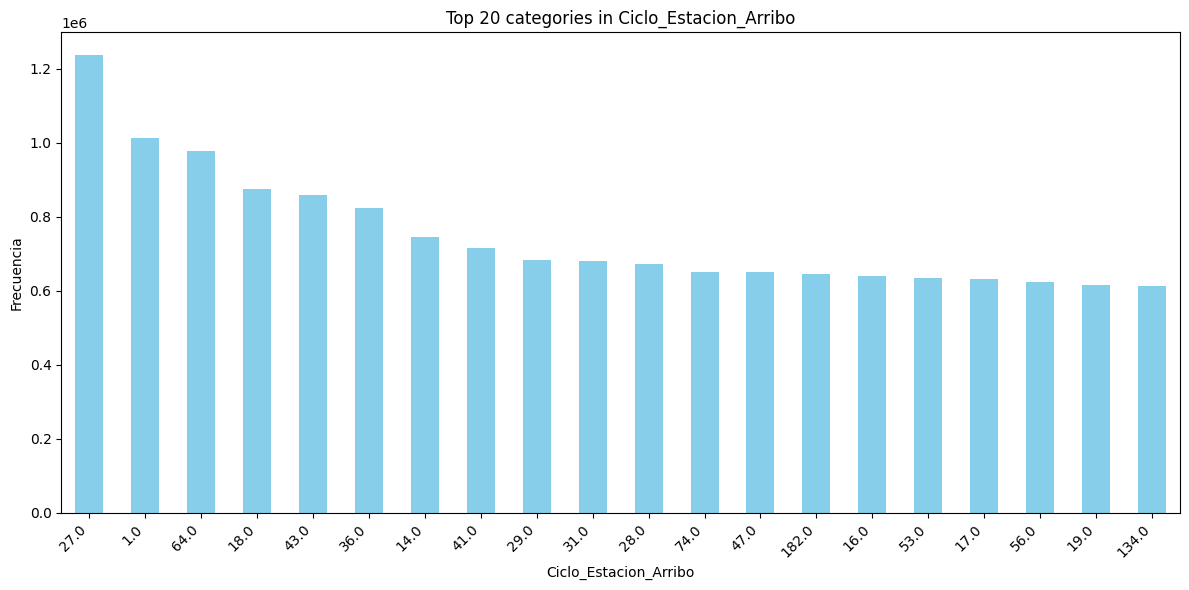

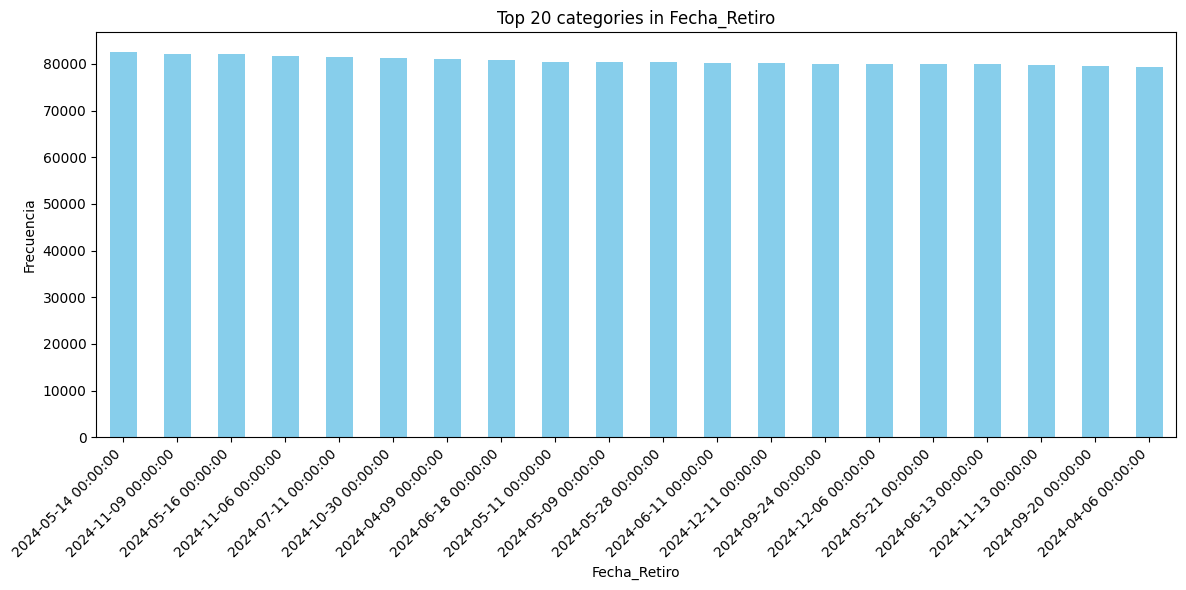

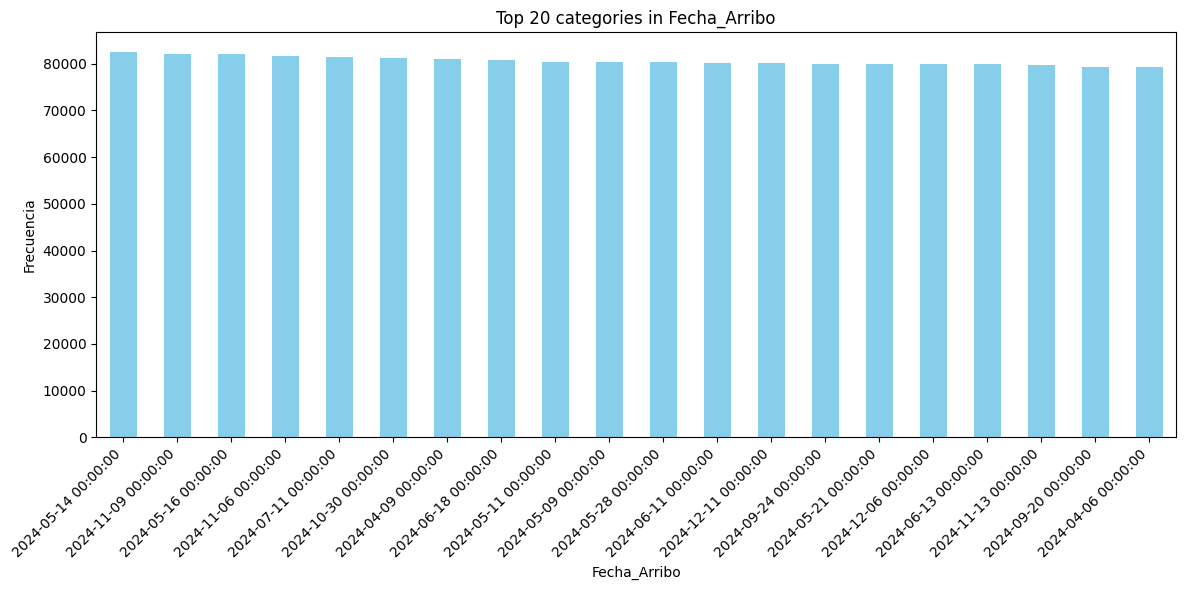

In [38]:
top_n = 20

for column in variables_discretas:
    counts = df1[column].value_counts()
    num_unique = len(counts)

    if num_unique > top_n:
        counts_to_plot = counts.nlargest(top_n)
        title = f'Top {top_n} categories in {column}'
    else:
        counts_to_plot = counts
        title = f'All categories in {column}'

    plt.figure(figsize=(12, 6))
    counts_to_plot.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

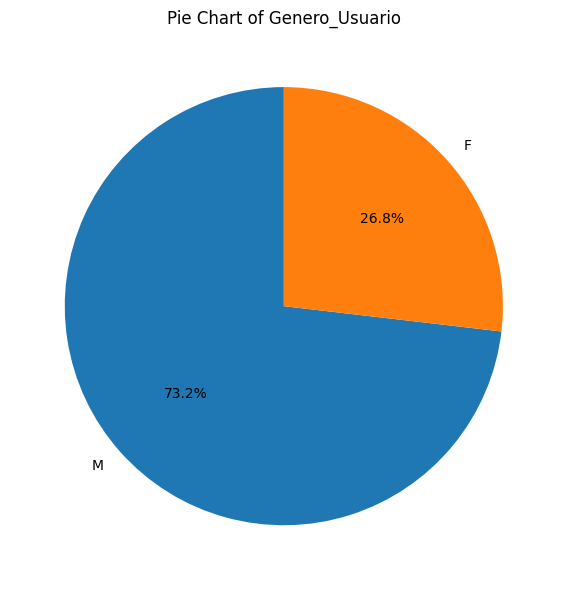

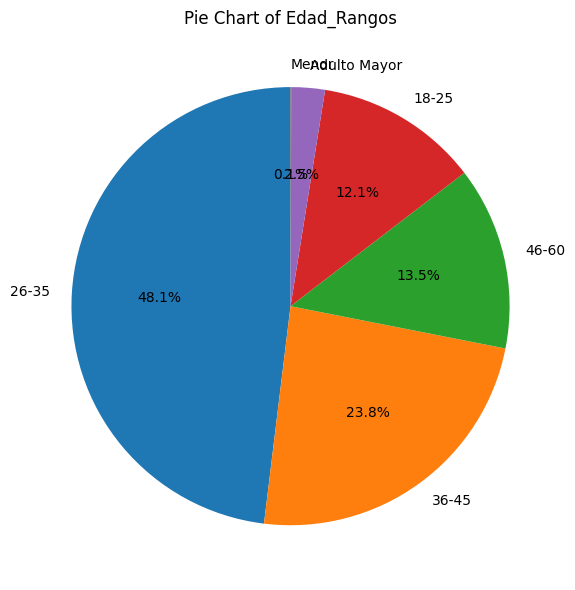

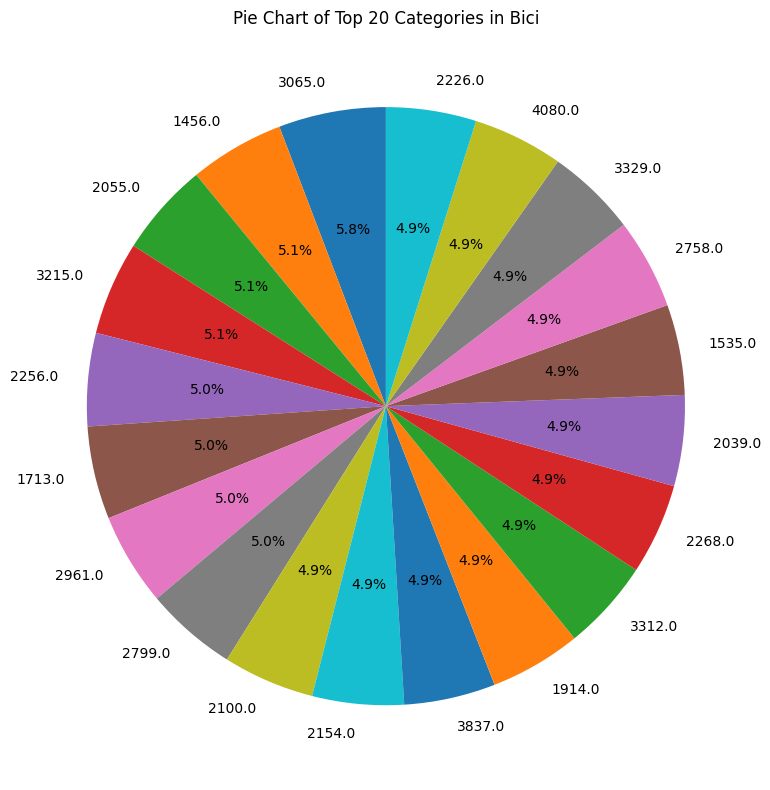

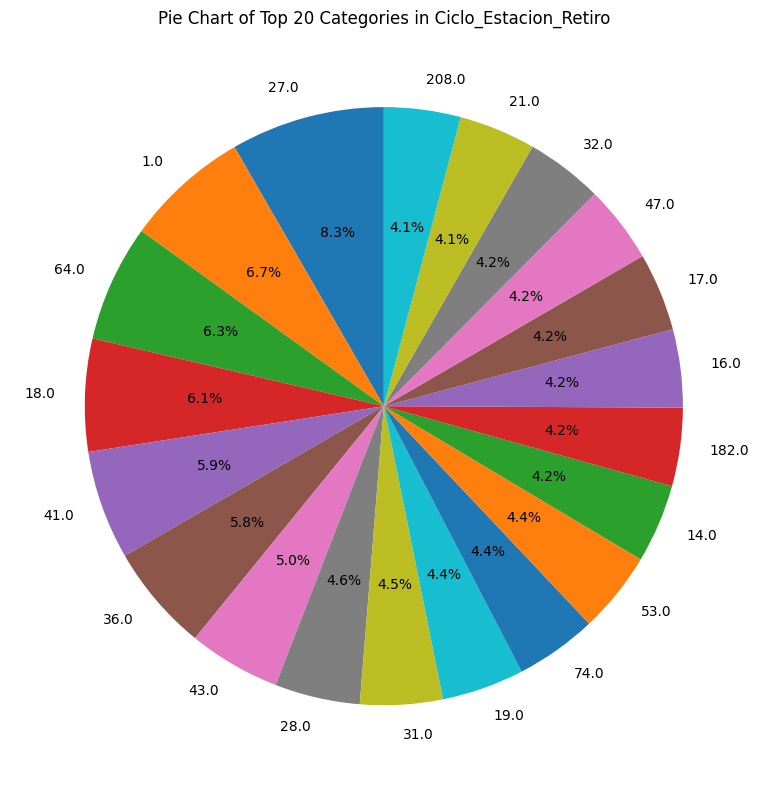

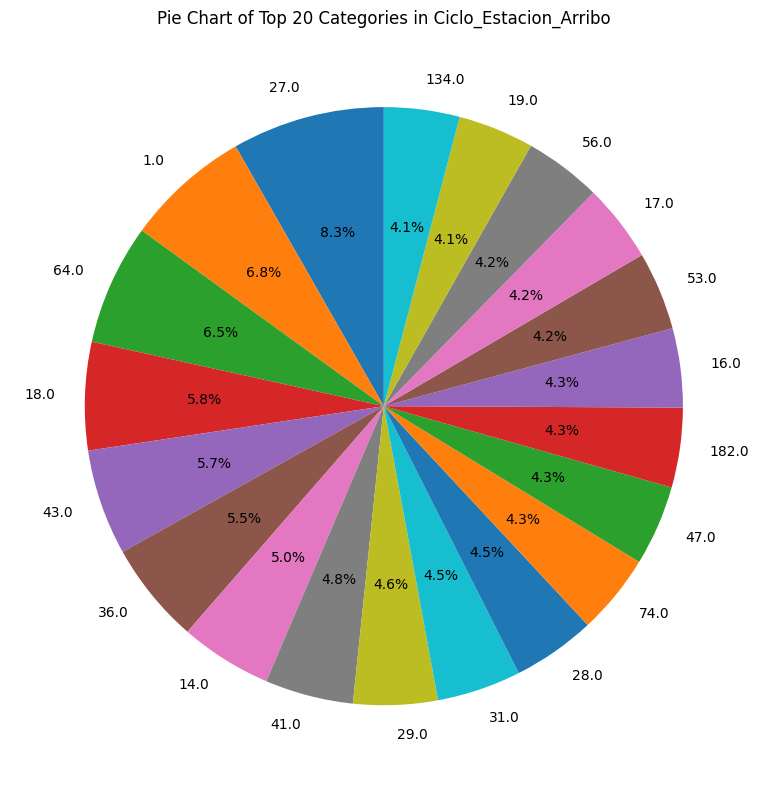

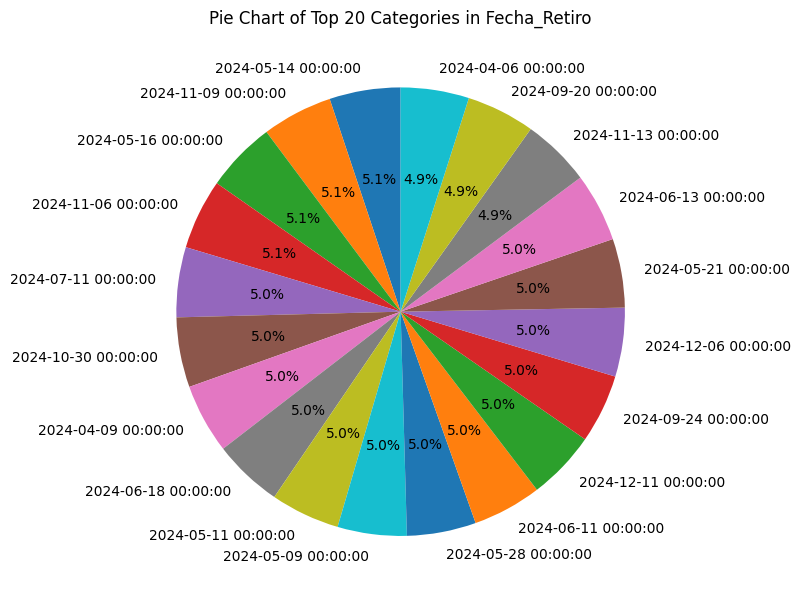

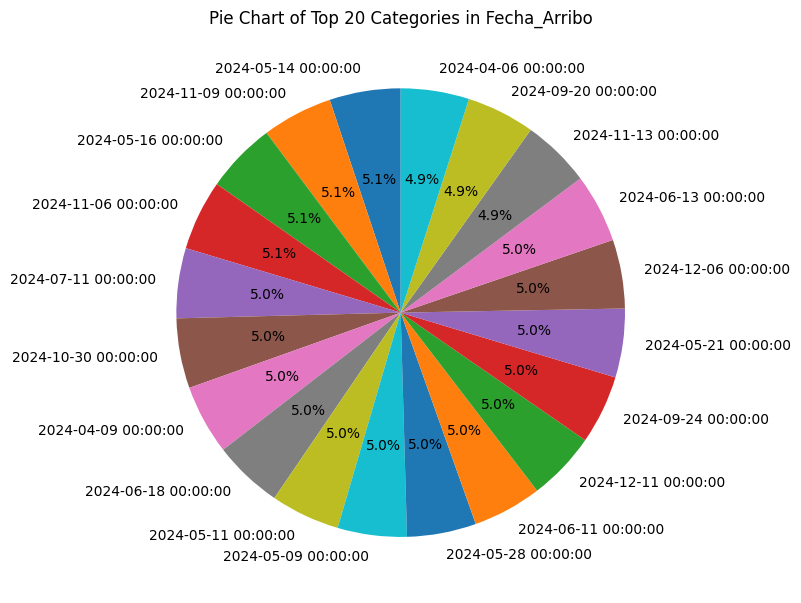

In [39]:
for column in variables_discretas:
    data = df1[column].value_counts()
    num_unique = len(data)

    if num_unique > 20:
        top_n = 20
        top_counts = data.nlargest(top_n)

        plt.figure(figsize=(8, 8))
        plt.pie(top_counts, labels=top_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Pie Chart of Top {top_n} Categories in {column}')
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(6, 6))
        plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Pie Chart of {column}')
        plt.tight_layout()
        plt.show()

In [40]:
df1

,Genero_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Duracion,Edad_Rangos
0,M,69.0,85.0,2010-02-16,85.0,2010-02-16,3.083333,26-35
1,M,11.0,85.0,2010-02-16,26.0,2010-02-16,28.900000,26-35
2,M,43.0,85.0,2010-02-16,13.0,2010-02-16,28.016667,36-45
3,M,826.0,22.0,2010-02-16,85.0,2010-02-16,16.550000,36-45
4,M,662.0,27.0,2010-02-16,74.0,2010-02-16,58.033333,18-25
...,...,...,...,...,...,...,...,...
123028689,M,3499332.0,34.0,2025-06-30,570.0,2025-06-30,12.816667,26-35
123028690,F,7103211.0,21.0,2025-06-30,71.0,2025-06-30,6.700000,36-45
123028691,F,4275772.0,547.0,2025-06-30,259.0,2025-06-30,10.616667,18-25
123028692,M,8124844.0,547.0,2025-06-30,259.0,2025-06-30,11.033333,18-25


In [41]:
df1.drop(columns=['Fecha_Retiro', 'Fecha_Arribo'], inplace=True)

In [42]:
df1.describe()

,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Duracion
count,1.230175e+08,1.209268e+08,1.207016e+08,1.228735e+08
mean,2.053815e+06,2.045044e+02,2.033868e+02,1.471932e+01
std,2.920888e+06,7.228888e+03,7.445300e+03,2.087979e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.666667e-02
25%,3.368000e+03,5.800000e+01,5.700000e+01,6.766667e+00
50%,9.309000e+03,1.510000e+02,1.470000e+02,1.107595e+01
75%,4.276820e+06,2.800000e+02,2.760000e+02,1.833333e+01
max,8.999708e+06,4.422222e+06,4.422222e+06,1.439917e+03
